# Урок 3. Классификация. Логистическая регрессия.

**План занятия**

* [Теоретическая часть](#theory)
    * [Линейная классификация](#lin)
        * [Функционал ошибки в линейной классификации](#error)
    * [Логистическая регрессия](#logreg)
        * [Метод максимального правдоподобия](#mle)
        * [Реализация логистической регрессии](#implement_logreg)
    * [Оценка качества классификации](#metrics)
* [Практическая часть](#practice)
    * [Домашнее задание](#hw)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

## Линейная классификация<a class='anchor' id='lin'>

До этого мы разговаривали о задачах регрессии, то есть о восстановлении непрерывной зависимости по имеющимся данным. Однако, это не единственный тип задач в машинном обучении. В этом уроке речь пойдет о задачах _классификации_. Это такие задачи, в которых объекты делятся на конечное количество классов, и целью обучения является получение модели, способной соотносить объекты к тому или иному классу. 

Простейшим случаем является *бинарная классификация*, то есть случай, когда у нас имеется два класса. Единственное отличие от линейной регрессии здесь в том, что пространство ответов состоит из двух элементов, в нашем случае возьмем $\mathbb{Y} = \{-1,1\}$, где -1 и 1 означают принадлежность к первому или второму классу, соответственно. Пример такой задачи упоминался на первом уроке, когда говорилось о распознавании спам-писем. В этом случае, -1 означало, что письмо не является спамом, а 1 - что является.

<img src="images/log_reg.png">

Как и в случае регрессии, в классификации можно использовать линейные модели. Это называется _линейной классификацией._ Линейные классификаторы устроены похожим на линейную регрессию образом, за одним лишь различием - для получения бинарных значений берется только знак от значения $a(x)$:

$$a(x) = \text{sign}\left (w_{0}+\sum^{d}_{i=1}w_{i}x^{i} \right ).$$

Аналогично линейной регрессии, после добавления константного признака формула имеет вид

$$\text{sign} \left ( \sum^{d+1}_{i=1}w_{i}x^{i} \right ) = \text{sign} \left ( \left \langle w,x \right \rangle \right ).$$

Множество точек $\left \langle w,x \right \rangle = 0$ образует _гиперплоскость_ в пространстве признаков и делит его на две части. Объекты, расположенние по разные стороны от нее, относятся к разным классам.


<img src="images/log_reg_m.png">

+ + = +
- - = +
+ - = -
- + = -

$$M_i = y_i(\langle w,x \rangle)$$

$M_i > 0$ - классификатор дает верный ответ<br>
$M_i < 0$ - классификатор ошибается<br>
Чем дальше отступ от нуля, тем классификатор больше уверен в своём ответе

Стоит отметить, что для некоторого объекта $x$ расстояние до этой гиперплоскости будет равняться $\frac{| \left \langle w,x \right \rangle |}{||w||}$, соответственно, при классификации нам важен не только знак скалярного произведения $\left \langle w,x \right \rangle$, но и его значение: чем выше оно, тем больше будет расстояние от объекта до разделяющей гиперплоскости, что будет означать, что алгоритм более уверен в отнесении объекта к данному классу. Это приводит нас к значению *отступа*, который равен скалярному произведению вектора весов $w$ на вектор признаков $x$, умноженному на истинное значение ответа $y$, которое, как мы помним, принимает значения -1 и 1:

$$M_{i}=y_{i}\left \langle w,x_{i} \right \rangle.$$

Таким образом, если скалярное произведение отрицательно, и истинный ответ равен -1, отступ будет больше нуля. Если скалярное произведение положительно, и истинный ответ равен 1, отступ также будет положителен. То есть $M_{i}>0$, когда классификатор дает верный ответ, и $M_{i}<0$, когда классификатор ошибается. Отступ характеризует корректность ответа, а его абсолютное значение свидетельствует о расстоянии от разделяющей гиперплоскости, то есть о мере уверенности в ответе.

### Функционал ошибки в линейной классификации<a class='anchor' id='error'>

Как и в случае линейной регрессии, для обучения алгоритма линейной классификации требуется измерять ошибку. По аналогии с средней абсолютной ошибкой и среднеквадратичной ошибкой в случае линейной классификации можно использовать естественный подход: так как возможных ответов конечное число, можно требовать полного совпадения предсказанного класса $a(x_{i})$ и истинного $y_{i}$. Тогда в качестве функционала ошибки можно использовать долю неправильных ответов:

$$Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}[a(x_{i}) \neq y_{i}]$$

или, используя понятие отступа,

$$Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}[M_{i}<0] = \frac{1}{l}\sum^{l}_{i=1}[y_{i}\left \langle w,x_{i} \right \rangle < 0].$$

Функция, стоящая под знаком суммы, называется _функцией потерь_. График ее в зависимости от отступа будет иметь пороговый вид:

In [25]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [26]:
def loss_function(x):
    return 0 if x > 0 else 1

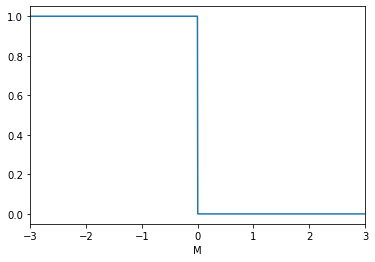

In [27]:
dots = np.linspace(-3, 3, 1000)
q_zero_one_loss = [loss_function(x) for x in dots]

plt.xlabel('M')
plt.xlim(-3, 3)
plt.plot(dots, q_zero_one_loss);

Она называется _пороговой функцией потерь_ или 1/0 функцией потерь. Как мы видим, она негладкая, поэтому градиентные методы оптимизации к ней неприменимы. Для упрощения оптимизации используют гладкие оценки сверху этой функции, то есть такие функции, что 

$$[M_{i}<0] \leq \tilde{L}(M_{i}).$$

Тогда минимизировать уже нужно эту новую функцию:

$$Q(a, X) \leq \tilde Q(a, X) = \frac{1}{l}\sum^{l}_{i=1}\tilde{L}(M_{i}) \rightarrow \underset{w}{\text{min}}.$$

Примерами могут быть:

- _экспоненциальная функция потерь_ $\tilde{L}(M_{i}) = \text{exp}(- M_{i})$


- _логистическая функция потерь_ $\tilde{L}(M_{i}) = \text{log}(1 + \text{exp}(- M_{i}))$


- и др. (см. доп. материалы)

Реализуем их и построим соответствующие графики.

In [28]:
def exp_loss_func(x):
    return np.exp(-x)

In [29]:
def logistic_loss(x):
    return np.log2(1 + np.exp(-x))

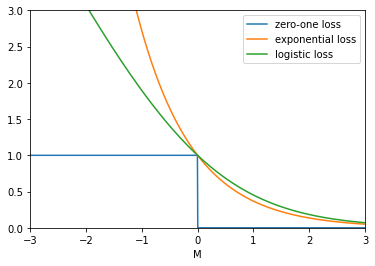

In [30]:
q_exp_loss = [exp_loss_func(x) for x in dots]
q_logistic_loss = [logistic_loss(x) for x in dots]

plt.xlabel('M')
plt.xlim(-3, 3)
plt.ylim(0, 3)
plt.plot(dots, q_zero_one_loss)
plt.plot(dots, q_exp_loss)
plt.plot(dots, q_logistic_loss)
plt.legend(['zero-one loss', 'exponential loss', 'logistic loss']);

Все они оценивают функцию потерь сверху и при этом хорошо оптимизируются.

## Логистическая регрессия<a class='anchor' id='logreg'>

_Логистическая регрессия_ - частный случай линейного классификатора, обладающий одной полезной особенностью - помимо отнесения объекта к определенному классу она умеет прогнозировать вероятность $P$ того, что объект относится к этому классу.

Во многих задачах такая особенность является очень важной. Например, в задачах кредитного скоринга (предсказание, вернет клиент кредит или нет) прогнозируют вероятность невозврата кредита и на основании нее принимают решение о выдаче или невыдаче.

Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу "+1" $P(y=1|x)$ (условная вероятность $y = 1$ при условии $x$). Она будет принимать значения от 0 до 1, и нам нужно каким-то образом ее предсказывать, но пока мы умеем только строить прогноз методами линейной регрессии с помощью некоего алгоритма $b(x)=\left \langle w,x_{i} \right \rangle$. У него есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая будет переводить полученное в скалярном произведении значение в вероятность, пределы которой будут лежать в промежутке от 0 до 1. В модели логистической регрессии в качестве такой функции берется сигмоида, которая имеет вид:

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

Изобразим ее график.

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

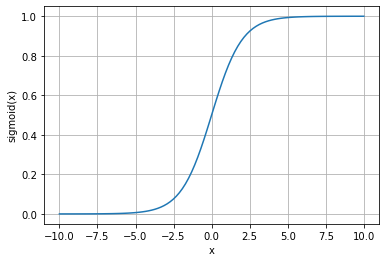

In [32]:
dots = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value);

$$\sigma(z) = \frac{1}{(1 + exp(-z))^{-1}} = \frac{1}{1 + \frac{1}{exp(z)}} = \frac{exp(z)}{exp(z) + 1}$$

$$\sigma(z) = \frac{exp(z)}{1 + exp(z)}.$$

In [33]:
def sigmoid_2(x):
    return np.exp(x) / (1 + np.exp(x))

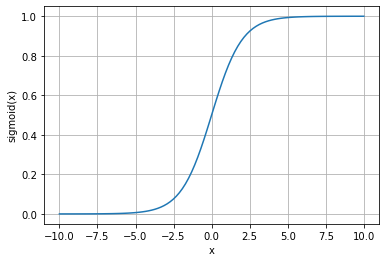

In [34]:
dots = np.linspace(-10, 10, 100)
sigmoid_value_2 = list(map(sigmoid_2, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value_2);

При использовании такой функции $\tilde{b}(x_{i}) = \sigma(\left \langle w,x_{i} \right \rangle)$ получаем, что вероятность отнесения объекта к классу "+1" $P(y=1|x)$, которую для краткости обозначим $p_{+}$, будет равняться

$$p_{+} = \sigma(\left \langle w,x_{i} \right \rangle) = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)},$$

Чем больше будет скалярное произведение $\left \langle w,x_{i} \right \rangle$, тем выше будет предсказанная вероятность.

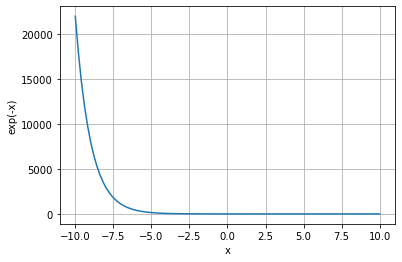

In [35]:
dots = np.linspace(-10, 10, 100)
exp_value = list(map(lambda x: np.exp(-x), dots))

plt.xlabel('x')
plt.ylabel('exp(-x)')
plt.grid()
plt.plot(dots, exp_value);

### Метод максимального правдоподобия <a class='anchor' id='mle'>

<img src='images/maximum_likelihood.png'>

Далее для обучения этой модели нам потребуется использовать _метод максимального правдоподобия_ (см. доп. материалы). Его сущность заключается в выборе гипотезы, при которой вероятность получить имеющееся наблюдение максимальна.

С точки зрения реализуемого алгоритма вероятность того, что в выборке встретится объект $x_{i}$ c классом $y_{i}$, равна

$$P(y=y_{i}|x_{i}) = p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

Исходя из этого, правдоподобие выборки (т.е. вероятность получить такую выборку с точки зрения алгоритма) будет равняться произведению вероятностей получения каждого имеющегося ответа:

$$P(y|X) = L(X) = \prod^{l}_{i=1} p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}.$$

Правдоподобие можно использовать как функционал для обучения алгоритма, однако, удобнее взять от него логарифм, так как в этом случае произведение превратится в сумму, а сумму гораздо проще оптимизировать. Также, в отличие от рассмотренных ранее функций потерь, правдоподобие требуется максимизировать для обучения алгоритма, а не минимизировать. Поэтому для большего удобства перед правдоподобием ставят минус, поскольку функции потери в задачах регрессии принято минимизировать. В итоге получим:

$$\text{ln}\prod^{l}_{i=1} p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]} = $$
$$ = \sum^{l}_{i=1} \text{ln}(p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]})$$

$$-\text{ln}L(X) = -\sum^{l}_{i=1}([y_{i} = +1] \text{ln}p_{+}) + [y_{i} = -1]\text{ln}(1 - p_{+}))).$$


Данная функция потерь называется _логарифмической функцией потерь (log loss)_ или _кросс-энтропией_.

В случае, когда имеются классы 1 и -1:

$$ p_{+} = \sigma({\langle w,x \rangle})$$
$$ p_{-} = \sigma(- {\langle w,x \rangle})$$

$$ p = \sigma(y{\langle w,x \rangle})$$

$$ \text{ln}L = - \sum^{l}_{i=1} \text{ln}(p_{+}^{[y_{i}=+1]}(1-p_{+})^{[y_{i}=-1]}) = $$
$$ = - \sum^{l}_{i=1} \text{ln}(\sigma(y{\langle w,x \rangle})) = - \sum^{l}_{i=1} \text{ln}(\frac{1}{1 + exp(-y{\langle w,x \rangle}})$$
$$ = \sum^{l}_{i=1} \text{ln}(1 + exp(-y{\langle w,x \rangle})$$

То есть в случае логистической регрессии обучение сводится к минимизации этого функционала.

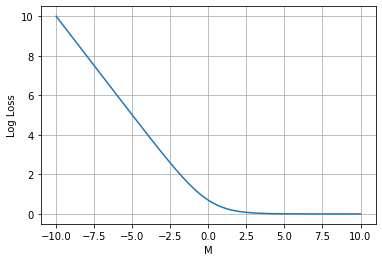

In [36]:
dots = np.linspace(-10, 10, 100)
log_loss_value = list(map(lambda x: - np.log(1 / (1 + np.exp(-x))), dots))
log_loss_value = list(map(lambda x: np.log(1 + np.exp(-x)), dots))

plt.xlabel('M')
plt.ylabel('Log Loss')
plt.grid()
plt.plot(dots, log_loss_value);

В общем виде log loss запишется как

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)} + (1 - y_{i})\text{ln} (1-\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)})).$$

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$



### Производные

<center><i>Сигмоида</i></center>

$$\sigma(z) = \frac{1}{1 + exp(-z)}$$

$$\frac{d\sigma(z)}{dz} = -\frac{1}{(1 + exp(-z))^2}(-exp(-z)) = \frac{exp(-z)}{(1 + exp(-z))^2} \text{(*)} = \frac{1}{1 + exp(-z)}(1-\frac{1}{1 + exp(-z)}) = \sigma(1-\sigma)$$

$ (*)\frac{exp(-z) +1-1}{(1 + exp(-z))^2} = \frac{1 + exp(-z) -1}{(1 + exp(-z))^2}= \frac{1 + exp(-z)}{(1 + exp(-z))^2} - \frac{1}{(1 + exp(-z))^2}=$

$ = \frac{1}{(1 + exp(-z))} - \frac{1}{(1 + exp(-z))}\frac{1}{(1 + exp(-z))} = \frac{1}{(1 + exp(-z))}(1- \frac{1}{(1 + exp(-z))}) $

<center><i>Логлосс</i></center>

$$\frac{dL}{dw} = -\sum^{l}_{i=1} (\frac{y_{i}} {\sigma} - \frac{1 - y_{i}} {1 - \sigma})\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{(1 - \sigma)y_{i} - \sigma(1 - y_{i})} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{(y_{i} - \sigma y_{i} - \sigma + \sigma y_{i})} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz}$$

$$ = -\sum^{l}_{i=1} \frac{y_{i} - \sigma} {\sigma(1 - \sigma)}\frac{d\sigma(z)}{dz} = -\sum^{l}_{i=1} \frac{y_{i} - \sigma} {\sigma(1 - \sigma)}\sigma(1 - \sigma) = \sum^{l}_{i=1} \sigma - y_{i} = \frac{1}{1 + exp(-\langle w,x\rangle)} - Y = X^{T}(\sigma-Y)$$


$\frac{d\langle w,x\rangle}{dw} = \frac{d Xw}{dw} = X^T$


### Реализация логистической регрессии<a class='anchor' id='implement_logreg'>

Напишем алгоритм логистической регрессии.

In [37]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=2, random_state=1)
# X, y = datasets.make_blobs(centers=2, cluster_std=2.5, random_state=12)
X, y

(array([[ 1.30022717, -0.7856539 ],
        [ 1.44184425, -0.56008554],
        [-0.84792445, -1.36621324],
        [-0.72215015, -1.41129414],
        [-1.27221465,  0.25945106],
        [ 0.78694271,  0.94294879],
        [ 0.81695766, -1.12478707],
        [ 1.6822707 , -0.67596877],
        [-1.07223343, -0.7701513 ],
        [-0.06539297,  1.11257376],
        [-1.33232952,  0.60245671],
        [-0.6963714 ,  0.96382716],
        [ 0.82340614,  0.7561926 ],
        [-1.5155534 , -0.15804853],
        [-0.78971776,  1.70347973],
        [ 0.85887841,  1.04457966],
        [-0.45001335,  0.27345841],
        [ 0.7099324 ,  0.69020919],
        [-0.79095935,  1.60495551],
        [-1.08077536, -1.15530746],
        [-1.5691733 , -0.54054806],
        [-0.52568843,  1.52568161],
        [-1.27406042, -0.1434304 ],
        [ 0.89621114, -1.11509679],
        [-0.85259895, -1.42554982],
        [-0.63262806,  1.2217558 ],
        [-0.86447712, -1.40921978],
        [-0.47819102,  3.174

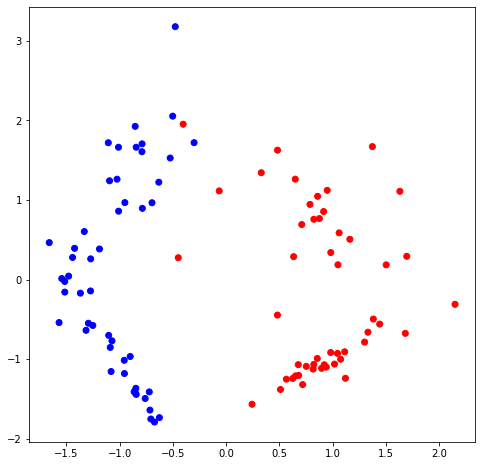

In [38]:
# и изобразим их на графике
colors = ListedColormap(['blue', 'red'])

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

Далее разделим выборку на обучающую и тестовую. При реальной работе, если нет специфических требований по сохранению порядка выборки, ее полезно перемешивать, так как данные в ней могут быть каким-либо образом отсортированы. Это может негативно сказаться на процессе обучения.

In [39]:
np.random.permutation(X.shape[0])

array([55, 11, 87, 29, 21, 88, 98, 23,  7, 63, 27, 53, 47, 51, 31, 13, 73,
       70, 65,  9, 60, 94, 32, 93,  2, 86, 25, 92, 67, 18, 58, 81, 89,  1,
        5, 69, 41, 57, 14, 82, 12, 96, 90, 24,  8, 40, 74, 61, 45, 97, 33,
        0, 15,  3, 80,  6, 62, 91, 59, 39, 42, 66, 17, 16, 50, 34, 75, 37,
       38, 79, 64, 43, 19, 77, 85, 20, 28,  4, 95, 78, 56, 22, 84, 26, 72,
       83, 76, 10, 46, 36, 49, 30, 54, 71, 35, 99, 52, 44, 48, 68])

In [40]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(X.shape[0])
X_shuffled, y_shuffled = X[shuffle_index], y[shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(X) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


Реализуем функцию потерь log loss с одновременным расчетом градиента.

Оптимизировать функционал ошибки будем с помощью градиентного спуска, его вид в случае использования такой функции потерь будет:

$$w_{n+1} = w_{n} - \eta \frac{1}{l}X^{T}(A-Y),$$

где $A=\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}.$

$$L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$$
$$L(X) = \sum^{l}_{i=1} \text{ln}(1 + exp(-y{\langle w,x \rangle})$$

In [41]:
def log_loss(w, X, y):
    m = X.shape[0]
    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(X, w))
        
    # labels 0, 1
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    
    # labels -1, 1
#     temp_y = np.where(y == 1, 1, -1)
#     loss = 1.0 / m * np.sum(np.log(1 + np.exp(-temp_y * np.dot(X, w))))

    grad = 1.0 / m * X.T @ (A - y)

    return loss, grad

Реализуем градиентный спуск

In [42]:
def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

и функцию для выполнения предсказаний

In [43]:
def predict(w, X):
    
    m = X.shape[0]
    
    y_predicted = np.zeros(m)

    A = np.squeeze(sigmoid(np.dot(X, w)))

    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5): 
            y_predicted[i] = 1
        elif (A[i] <= 0.5):
            y_predicted[i] = 0

    return y_predicted

In [44]:
# иницилизируем начальный вектор весов
w0 = np.zeros(X_train.shape[1])

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = np.mean(y_predicted_train == y_train) * 100.0
test_accuracy = np.mean(y_predicted_test == y_test) * 100.0

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [3.72659902 0.22383415]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667


Покажем, как менялась при этом функция потерь.

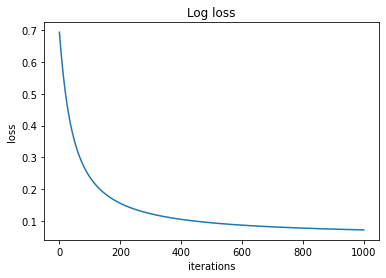

In [45]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses);

[Визуализация](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py) логистической регрессии

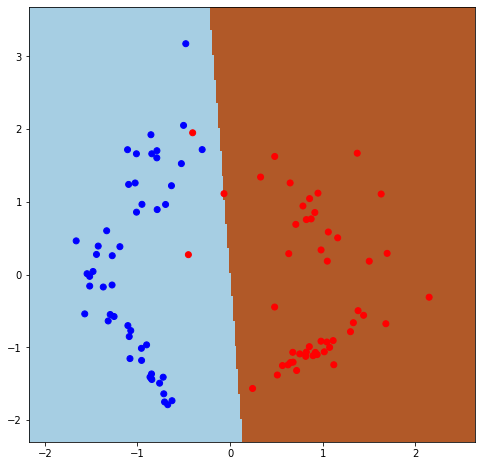

In [51]:
plt.figure(figsize=(8, 8))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict(w, np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

## Оценка качества классификации <a class='anchor' id='metrics'>

Как и в случае линейной регрессии, в задачах классификации требуется оценивать качество обученной модели. Для этого существует большое количество подходов.

Наиболее очевидным и простым способом является расчет *доли правильных ответов*:

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

**Проблемы accuracy:**<br>
    
    1) Дисбаланс классов
    
    кот - 950 наблюдений
    голубь - 50 наблюдений
    a(x) = кот

    accuracy?

    2) Ошибки могут иметь разную цену
<img src='images/scoring.png' width=400px>

### Матрица ошибок

Удобно представлять ответы в виде комбинации истинного ответа и ответа алгоритма. При этом получается так называемая _матрица ошибок_.

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a(x) = +1$$__  |  True Positive TP    |  False Positive  FP   |
| __$$a(x) = -1$$__ |   False Negative FN    |   True Negative TN   |

В матрице сверху отложены истинные ответы, слева - ответы алгоритма. Когда алгоритм относит объект к классу "+1", говорят, что он *срабатывает*, а когда к "-1", - *пропускает*. Если алгоритм сработал (дал положительный ответ) и объект действительно относится к классу "+1", говорят, что имеет место верное срабатывание/верный положительный ответ (True Positive, TP), а если объект не относится к классу "+1", это ложное срабатывание (False Positive, FP). Если алгоритм пропускает объект, а его истинный класс "+1", это ложный пропуск/ложный негативные ответ (False Negative, FN), а если истинный класс объекта "-1", имеет место истинный пропуск (True Negative, TN). При такой классификации уже есть два вида ошибок - ложные срабатывания и ложные пропуски. По главной диагонали в матрице ошибок располагаются верные ответы, по побочной - неверные.

### Точность и полнота

В классификации часто используются две метрики - _точность_ и _полнота_.

Точность (precision) представляет из себя долю истинных срабатываний от общего количества срабатываний. Она показывает, насколько можно доверять алгоритму классификации в случае срабатывания

$$precision(a, X) = \frac{TP}{TP+FP}.$$

Полнота (recall) считается как доля объектов, истинно относящихся к классу "+1", которые алгоритм отнес к этому классу

$$recall(a, X) = \frac{TP}{TP+FN},$$

здесь $TP+FN$ как раз будут вместе составлять весь список объектов класса "+1".

<img src='images/prec_vs_recall.png'>

__Пример__

Пусть у нас есть выборка из 100 объектов, из которых 50 относится к классу "+1" и 50 к классу "-1" и для этой работы с этой выборкой мы рассматриваем две модели: $a_{1}(x)$ с матрицей ошибок

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a_{1}(x) = +1$$__  |   40    |   10   |
| __$$a_{1}(x) = -1$$__ |   10    |   40   |
    

и $a_{2}(x)$ с матрицей ошибок:
 
 
|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a_{2}(x) = +1$$__  |   22    |   2   |
| __$$a_{2}(x) = -1$$__ |   28    |   48   |

Для первого алгоритма 

$$preсision(a_{1}, X)=0.8$$
$$recall(a_{1}, X)=0.8$$

Для второго алгоритма

$$preсision(a_{2}, X)=0.92$$
$$recall(a_{2}, X)=0.44$$

Как мы видим, точность второй модели очень высока, но при этом сильно снижена полнота. Поэтому нужно правильно формировать бизнес-требования к модели, какой именно показатель должен быть определяющим. Например, если в задаче кредитного скоринга банк ставит цель возврата 90% кредитов, задачей ставится максимизация полноты при условии точности не ниже 0.9. А если при распознавании спама стоит требование, например, распознавать 95% спам-писем, задача состоит в максимизации точности при условии полноты не ниже 0.95.

Однако, такое ограничение есть не всегда, и в остальных случаях требуется максимизировать и полноту и точность. Есть различные варианты объединения их в одну метрику, одним из наиболее удобных из них является *F-мера*, которая представляет собой среднее гармоническое между точностью и полнотой

$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

В отличие от, например, среднего арифметического, если хотя бы один из аргументов близок к нулю, то и среднее гармоническое будет близко к нулю. По сути, F-мера является сглаженной версией минимума из точности и полноты (см. графики).

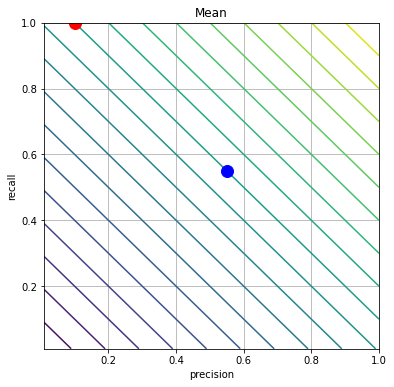

In [52]:
precisions, recalls = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

mean_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        mean_levels[i, j] = 1/2 * (precisions[i, j] + recalls[i, j])
        
plt.figure(figsize=(6, 6))
plt.title('Mean')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, mean_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.55, 0.55, 'bo', ms=12);

|  <empty>   | red | blue |
--- | --- | ---
| precision  |   0.1    |   0.55   |
| recall |   1    |   0.55   |
| mean |   0.55    |   0.55   |

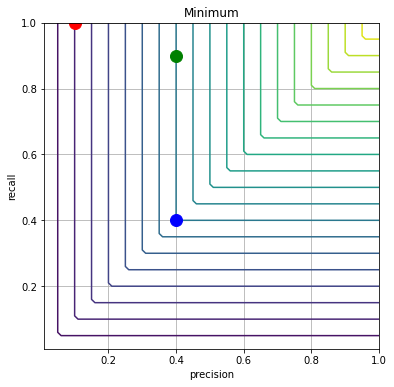

In [53]:
precisions, recalls = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

min_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        min_levels[i, j] = min([precisions[i, j], recalls[i, j]])
        
plt.figure(figsize=(6, 6))
plt.title('Minimum')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, min_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.4, 0.4, 'bo', ms=12)
plt.plot(0.4, 0.9, 'go', ms=12);

|  <empty>   | red | blue | green|
--- | --- | --- |---
| precision  |   0.1    |   0.4   | 0.4|
| recall |   1    |   0.4   | 0.9 |
| min |   0.1   |   0.4   | 0.4|

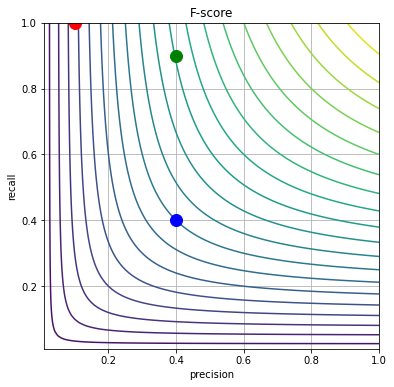

In [54]:
f_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        f_levels[i, j] = 2 * precisions[i, j] * recalls[i, j] / (precisions[i, j] + recalls[i, j])

plt.figure(figsize=(6, 6))        
plt.title('F-score')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, f_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.4, 0.4, 'bo', ms=12)
plt.plot(0.4, 0.9, 'go', ms=12);

|  <empty>   | red | blue | green|
--- | --- | --- |---
| precision  |   0.1    |   0.4   | 0.4|
| recall |   1    |   0.4   | 0.9 |
| f-score |   0.1818   |   0.4   | 0.55|

Существует также усовершенствованная версия F-меры $F_{\beta}$:

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

Параметр $\beta$ здесь определяет вес точности в метрике. При $\beta = 1$ это среднее гармоническое, умноженное на 2 (чтобы в случае $precision = 1$ и $recall = 1$ $F_{1} = 1$). Его изменение требуется, когда необходимо отдать приоритет точности или полноте, как это было показано в примерах ранее. Чтобы важнее была полнота, $\beta$ должно быть меньше 1, чтобы важнее была точность - больше.

### ROC-кривая

Итак, мы научились определять вероятность отнесения объекта к тому или иному классу и метрики, которые характеризуют качество работы алгоритма $a(x)=[b(x)>t]$, и теперь, чтобы конвертировать ее в бинарную метку (сделать выводы о принадлежности к классу), нужно определить значение порога вероятности $t$, при котором объект нужно относить к соответствующему классу. Естественным кажется вариант, при котором порог равен 0.5, но он не всегда оказывается оптимальным. Зачастую интерес представляет сам вещественнозначный алгоритм $b(x)$, а порог будет выбираться позже в зависимости от требований к точности и полноте. В таком случае появляется потребность в измерении качества семейства алгоритмов $a(x)=[b(x)>t]$ с различными $t$.

<img src='images/roc-curve.png' width=400>

Есть способы оценки модели в целом, не привязываясь к конкретному порогу. Первый из них основанна использовании _ROC-кривой_. Такая кривая строится в следующих координатах:

по оси $x$ откладывается доля ложных срабатываний (False Positive Rate) - отношение числа ложных срабатываний к общему размеру отрицательного класса:

$$FPR = \frac{FP}{FP+TN}$$

по оси $y$ откладывается доля верных срабатываний (True Positive Rate) - отношение числа верных срабатываний к размеру положительного класса:

$$TPR = \frac{TP}{TP+FN},$$

то есть TPR по сути представляет из себя полноту, о которой мы говорили ранее.

Точка на графике будет соответствовать конкретному классификатору с некоторым значением порога.

В качестве примера возьмем выборку из шести объектов, которым алгоритм $b(x)$ присвоил оценки принадлежности к классу 1:

| $$b(x)$$ | 0 | 0.1 | 0.2 | 0.3 | 0.5 | 0.6 |
| -------- | - | --- | --- | --- | --- | --- |
|  $$y$$   | 0 |  0  |  1  |  1  |  0  |  1  |


In [56]:
# отсечка 0

# b(x) = 0, 0.1, 0.2, 0.3, 0.5, 0.6
# y =    0   0   1    1    0    1

# a(x) - 1   1   1    1    1    1

| $$$$ | 0 | 0.1 | 0.2 | 0.3 | 0.5 | 0.6 | 0.99 |
| -------- | - | --- | --- | --- | --- | --- | --- |
|  $$TPR$$   | 1 | 1  | 1  | 0.66  |  0.33 | 0.33 |  0  |
|  $$FPR$$   | 1 | 0.66  | 0.33  |  0.33 | 0.33 | 0 |   0 |

____________

Теперь пойдем по порядку справа налево:

1. Сначала выбираем самый большой порог, при котором ни один объект не будет отнесен к первому классу. При этом доля верных срабатываний и доля ложных срабатываний равны нулю. Получаем точку (0, 0).
2. Далее снижая порог до 0,6, один объект будет отнесен к первому классу. Доля ложных срабатываний останется нулевой, доля верных срабатываний станет 1/3.
3. При дальнейшем уменьшении порога до 0,5 второй справа один объект будет отнесен к первому классу. TPR останется 1/3, FPR также станет равна 1/3.
4. Далее при снижении порога до 0.3 TPR станет 2/3, FPR останется 1/3.
5. При пороге 0.2 TPR станет равна 1, FPR останется 1/3.
6. При пороге 0.2 5 объектов будут отнесены алгоритмом к классу 1, TPR останется 1, FPR станет 2/3.
7. При дальнейшем уменьшении порога все объекты будут отнесены к первому классу, и TPR и FPR станут равны 1.

Построим соответствующий график

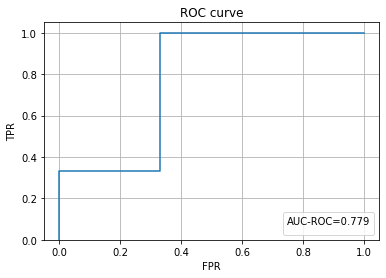

In [57]:
from numpy import trapz  # используем эту функцию для расчета площади под кривой

TPR = [0, 0.33, 0.33, 0.66, 1, 1, 1]
FPR = [0, 0, 0.33, 0.33, 0.33, 0.66, 1]

AUC_ROC = trapz(TPR, x = FPR, dx=0.1)

plt.title('ROC curve')
plt.ylim(0, 1.05)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend(' ', title=f'AUC-ROC={AUC_ROC:.3f}', loc='lower right')
plt.plot(FPR, TPR);

ROC кривая всегда идет из точки (0,0) в точку (1,1). При этом в случае наличия идеального классификатора с определенным порогом доля его верных ответов будет равна 1, а доля ложных срабатываний - 0, то есть график будет проходить через точку (0,1). Таким образом, чем ближе к этой точке проходит ROC-кривая, тем лучше наши оценки и лучше используемое семейство алгоритмов. Таким образом мерой качества оценок принадлежности к классу 1 может служить площадь под ROC-кривой. Такая метрика называется AUC-ROC (Area Under Curve - площадь под кривой ROC). В случае идеального алгоритма $AUC-ROC = 1$, а в случае худшего приближается к $\frac{1}{2}$.

Критерий AUC-ROC можно интерпретировать как вероятность того, что если выбрать случайные положительный и отрицательный объект выборки, положительный объект получит оценку принадлежности выше, чем отрицательный.

Обычно объектов гораздо больше, чем в нашем примере, поэтому кривая в реальных задачах выглядит несколько иначе - в ней больше точек.

AUC-ROC не очень устойчив к несбалансированным выборкам. Допустим, нам нужно выбрать 100 релевантных документов из выборки в 1000000 документов. И у нас есть алгоритм, который дает выборку из 5000 документов, 90 из которых релевантны. В этом случае 

$$TPR=\frac{TP}{TP+FN} = \frac{90}{90+10}=0.9$$

$$FPR=\frac{FP}{FP+TN} = \frac{4910}{4910+994990}=0.00491$$,

Что является показателями очень хорошего алгоритма - AUC-ROC будет близка к 1, хотя на самом деле 4910 из 5000 выданных документов являются нерелевантными.

Чтобы посмотреть реальное положение дел, рассчитаем точность и полноту:

$$precision = \frac{TP}{TP+FP}=\frac{90}{90+4910} = 0.018$$

$$recall = TPR = 0.9.$$

Здесь уже видно, что алгоритм является недостаточно точным.

Таким образом, если размер положительного класс значительно меньше отрицательного, AUC-ROC может давать неадекватную оценку качества алгоритма, так как измеряет долю ложных срабатываний относительно общего числа отрицательных объектов, и если оно большое, доля будет мала, хотя в абсолютном значении количество ложных срабатываний может заметно превышать количество верных срабатываний.

<img src='images/pr-curve.png' width=400>


Избавиться от такой проблемы можно используя другой метод - *кривую точности-полноты (PR-кривую)*. По оси $x$ откладывается полнота, по оси $y$ - точность, а точка на графике, аналогично ROC-кривой, будет соответствовать конкретному классификатору с некоторым значением порога. 

Возьмем использованный нами для постройки ROC-кривой набор данных и аналогичным образом построим PR-кривую.


| $$b(x)$$ | 0 | 0.1 | 0.2 | 0.3 | 0.5 | 0.6 |
| -------- | - | --- | --- | --- | --- | --- |
|  $$y$$   | 0 |  0  |  1  |  1  |  0  |  1  |

In [59]:
# отсечка 0

# b(x) = 0, 0.1, 0.2, 0.3, 0.5, 0.6
# y =    0   0   1    1    0    1

# a(x) = 1   1   1    1    1    1

| $$$$ | 0 | 0.1 | 0.2 | 0.3 | 0.5 | 0.6 | 0.9 |
| -------- | - | --- | --- | --- | --- | --- | --- |
|  $$Precision$$   | 0.5 | 0.6  | 0.75 | 0.66 | 0.5 | 1 | 0  |
|  $$Recall$$      | 1 | 1  | 1 | 0.66 |0.33  | 0.33 | 0  |

___________

Она всегда стартует в точке (0,0) и заканчивается в точке (1, r), где r - доля положительных объектов в выборке. В случае наличия идеального классификатора, у которого точность и полнота 100%, кривая пройдет через точку (1,1). Таким образом, чем ближе к этой точке кривая проходит, тем лучше оценки. Так что, как и в случае ROC-кривой, можно ввести метрику качества в виде площади под PR-кривой AUC-PR.

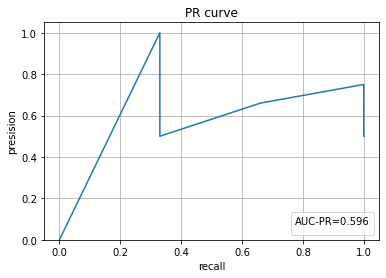

In [60]:
precision = [0, 1, 0.5, 0.66, 0.75, 0.6, 0.5]
recall = [0, 0.33, 0.33, 0.66, 1, 1, 1]

AUC_PR = trapz(precision, x = recall, dx=0.1)

plt.title('PR curve')
plt.ylim(0, 1.05)
plt.xlabel('recall')
plt.ylabel('presision')
plt.grid()
plt.legend(' ', title=f'AUC-PR={AUC_PR:.3f}', loc='lower right')
plt.plot(recall, precision);

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [63]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [64]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [65]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [66]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [67]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [104]:
def calc_logloss(y, y_pred):
#     Изменения
    y_pred_copy = y_pred.astype("float64").copy()
    y_pred_copy[y_pred_copy == 0] = 1e-9
    y_pred_copy[y_pred_copy == 1] = 1 - 1e-9
#     Изменения
    err = - np.mean(y * np.log(y_pred_copy) + (1.0 - y) * np.log(1.0 - y_pred_copy))
    
    return err

In [109]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0])
calc_logloss(y1, y_pred1)

9.999999722180686e-10

In [108]:
# Плохой пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0, 1])
calc_logloss(y1, y_pred1)

20.723265851087376

In [71]:
y_pred1[y_pred1 == 0] = 5

In [72]:
y_pred1.astype("float64")

array([0.8, 5. ])

In [73]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [74]:
z = np.linspace(-10, 10, 101)

In [75]:
probabilities = sigmoid(z)

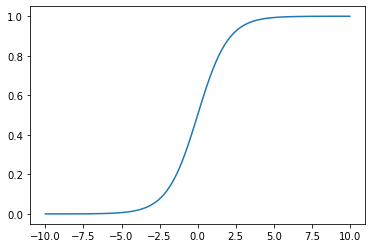

In [76]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [77]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W, err

In [123]:
model = eval_model(X_st, y, iterations=500, eta=1e-4)

## Домашнее задание <a class='anchor' id='hw'>

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [111]:
def calc_logloss(y, y_pred):
#     Изменения
    y_pred_copy = y_pred.astype("float64").copy()
    y_pred_copy[y_pred_copy == 0] = 1e-9
    y_pred_copy[y_pred_copy == 1] = 1 - 1e-9
#     Изменения
    err = - np.mean(y * np.log(y_pred_copy) + (1.0 - y) * np.log(1.0 - y_pred_copy))
    return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [113]:
from itertools import product

def iterator(func, eta_list, iter_list, X, y):
    n = X.shape[0]
    array_for_return = []
    for eta, n_iter in product(eta_list, iter_list):        
        W, err = func(X, y, n_iter, eta)
        
        print(f'Learning cycle ended with: eta={eta}, n_iter={n_iter},  W = {W}, Logloss = {round(err,2)}')
        array_for_return.append([eta, n_iter, err])    
    return np.array(array_for_return)

In [114]:
eta_list = [10**x for x in range(-2, -8, -1)]
iter_list = np.linspace(100, 1000, 5, dtype="int")

display(eta_list)
display(iter_list)

[0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]

array([ 100,  325,  550,  775, 1000])

In [115]:
np.set_printoptions(precision=2)

In [116]:
arr = iterator(eval_model, eta_list, iter_list, X, y)

/tmp/ipykernel_4677/2870899410.py:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


Learning cycle ended with: eta=0.01, n_iter=100,  W = [ 0.47 -0.43 -1.1   1.62], Logloss = 10.36
Learning cycle ended with: eta=0.01, n_iter=325,  W = [ 0.41 -1.05  3.33  1.86], Logloss = 10.36
Learning cycle ended with: eta=0.01, n_iter=550,  W = [ 0.34 -1.7   1.83  2.09], Logloss = 10.36
Learning cycle ended with: eta=0.01, n_iter=775,  W = [ 0.28 -2.34  0.33  2.31], Logloss = 10.36
Learning cycle ended with: eta=0.01, n_iter=1000,  W = [ 0.21 -2.99 -1.17  2.54], Logloss = 10.36
Learning cycle ended with: eta=0.001, n_iter=100,  W = [ 0.49 -0.17  0.35  1.53], Logloss = 81.02
Learning cycle ended with: eta=0.001, n_iter=325,  W = [ 0.49 -0.23 -0.11  1.55], Logloss = 10.36
Learning cycle ended with: eta=0.001, n_iter=550,  W = [ 0.48 -0.3  -0.33  1.58], Logloss = 10.36
Learning cycle ended with: eta=0.001, n_iter=775,  W = [ 0.47 -0.36 -0.13  1.6 ], Logloss = 10.36
Learning cycle ended with: eta=0.001, n_iter=1000,  W = [ 0.47 -0.42  0.42  1.62], Logloss = 48.86
Learning cycle ended wi

[(0.0, 20.0)]

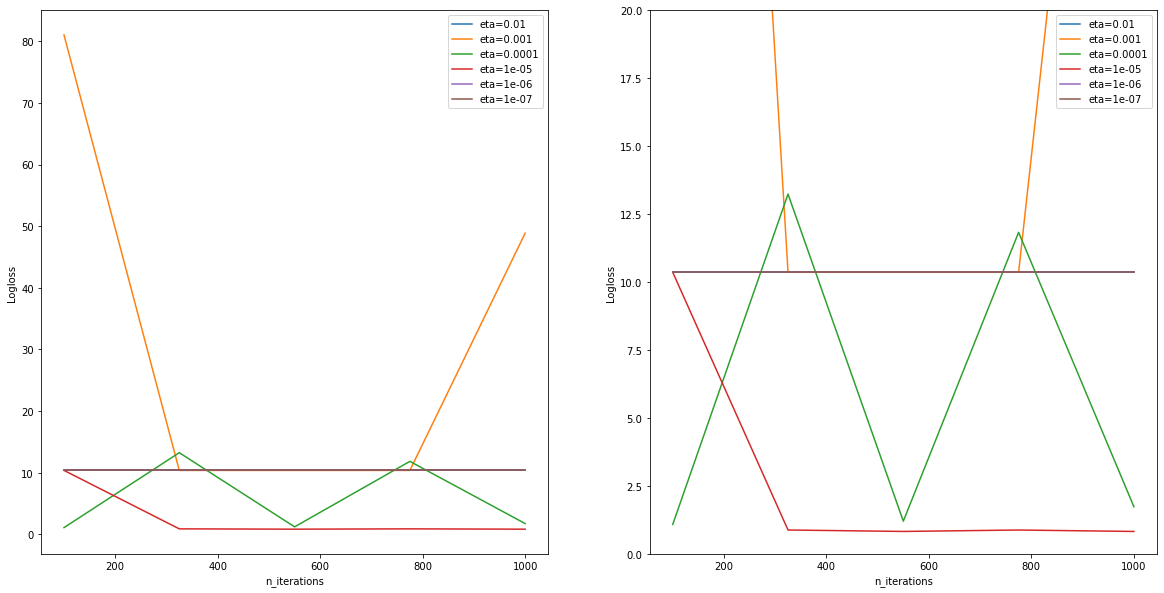

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(20)

for eta in eta_list:
    ax1.plot(arr[np.where(arr[:,0] == eta)][:,1], arr[np.where(arr[:,0] == eta)][:,2], label=f'eta={eta}')
    ax2.plot(arr[np.where(arr[:,0] == eta)][:,1], arr[np.where(arr[:,0] == eta)][:,2], label=f'eta={eta}')

for ax in (ax1, ax2):
    ax.set(xlabel='n_iterations', ylabel='Logloss')    
    ax.legend()

ax2.set(ylim=(0,20))

**Вывод:** Лучшие результаты по Logloss были получены при eta = 1e-5 и количестве итераций > 300

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [118]:
def calc_pred_proba(W, X):
    y_pred_proba = np.squeeze(sigmoid(np.dot(X, W)))
    return y_pred_proba

In [124]:
calc_pred_proba(model[0], X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [125]:
def calc_pred(W, X, threshold=0.5):
    y_pred = np.zeros(X.shape[0])
    pred = np.squeeze(sigmoid(np.dot(X, W)))
        
    for x in range(pred.shape[0]):
        if x >= threshold:
            y_pred[x] = 1
        if x < threshold:
            y_pred[x] = 0
    return y_pred

In [126]:
y_pred = calc_pred(model[0],X)

5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [127]:
def accuracy(y, y_pred):
    l = y.shape[0]
    return 1.0 / l * sum(y == y_pred)

def precision(y, y_pred):
    tp = sum(y_pred[y == 1]) 
    fp = sum(y_pred[y == 0])
    return tp / (tp + fp)

def recall(y, y_pred):
    tp = sum(y_pred[y == 1])
    fn = sum(y_pred[y == 1]==0)
    return tp / (tp + fn)

def f1_score(y, y_pred):
    p = precision(y, y_pred)
    r = recall(y, y_pred)
    return 2 * p * r / (p+r)

In [128]:
print(accuracy(y, y_pred))
print(precision(y, y_pred))
print(recall(y, y_pred))
print(f1_score(y, y_pred))

0.6000000000000001
0.5555555555555556
1.0
0.7142857142857143


6. Могла ли модель переобучиться? Почему?

Не могла, так как модель линейна

Проект *: 
1. https://www.kaggle.com/c/gb-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/gb-choose-tutors классификация

## Дополнительные материалы

1. [Функции потерь для классификации](https://en.wikipedia.org/wiki/Loss_functions_for_classification)

2. Метод максимального правдоподобия: [Сложное описание](https://habr.com/ru/company/ods/blog/323890/#metod-maksimalnogo-pravdopodobiya) / [Простое описание](https://www.youtube.com/watch?v=2iRIqkm1mug)

3. [Встроенные датасеты Sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

4. Площаль под кривой [numpy.trapz](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.trapz.html)
5. [Видео про метрику Accuracy](https://youtu.be/CCH-1gJo_z0)
6. [Видео про метрики Precision, Recall](https://youtu.be/AfnBHL832Eg)
7. [Видео про метрику F-score](https://youtu.be/PeE3Fkt5W3Q)
8. [Видео про метрику PR-AUC](https://youtu.be/QW-09jHQH-w)

##  Summary

* Логистическая регрессия - частный случай линейной классификации - предсказывает вероятность отнесения объекта к основному классу, что зачастую очень важно при интерпретации
* Для "отображения" действительных предсказаний линейной модели в "вероятностный" интервал [0,1] применяют сигмоиду
* Для обучения логистической регрессии используют логарифмическую функцию потерь (log-loss), полученную методом максимального правдоподобия (maximum likelihood estimation)
* Оптимизируем log-loss классическим градиентным спуском, в котором берем градиент log-loss'а
* Основными метриками качества классификатора являются Accuracy, Precision, Recall, ROC-AUC, PR-AUC, F-мера
* Нужно быть внимательным при работе с этими метриками и хорошо понимать, как они работают и как между собой связаны, иначе выводы могут получиться неверными

### Опеределения
*Масштабирование данных*

**Классификация** — задача, в которой имеется множество объектов, разделённых некоторым образом на классы.

**Линейный классификатор** — алгоритм классификации, основанный на построении линейной разделяющей поверхности.

**Отступ (для классификатора)** — эвристика, оценивающая то, насколько объект принадлежит классу, насколько эталонным представителем он является.
____________
_Логистическая регрессия_

**Логистическая регрессия** — метод построения линейного классификатора, позволяющий оценивать апостериорные вероятности принадлежности объектов классам.

**Риск** – отношение вероятности «положительный эффект» к вероятности «отрицательный эффект».

**Логит** – натуральный логарифм отношения вероятности «положительный эффект» к вероятности «отрицательный эффект».
____________
_Метрики качества классификации_

**Accuracy** – доля правильных ответов.

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

**Точность (precision)** – долю истинных срабатываний от общего количества срабатываний.

$$precision(a, X) = \frac{TP}{TP+FP}.$$

**Полнота (recall)** – доля объектов, истинно относящихся к выбранному классу, которые алгоритм отнес к этому классу.

$$recall(a, X) = \frac{TP}{TP+FN},$$

**F-мера** – среднее гармоническое между точностью и полнотой.

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

**ROC-кривая** (receiver operating characteristic) — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (TPR), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (FPR) при варьировании порога решающего правила.

**PR-кривая** — график, позволяющий оценить качество бинарной классификации, отображает соотношение между Precision и Recall.